In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



My attempt at a tov equation solver using eq 4.51 and 4.52 from JSB compact stars and also recent JSB paper

$$
\frac{dP}{dr} = -G\frac{m_r(r) \varepsilon(r)}{r^2} (1 + \frac{P(r)}{\varepsilon(r)}) (1 +\frac{4 \pi r^{3} P(r)}{m_r(r)}) (1- \frac{2 G m_r(r)}{r})^{-1}   (1)
$$

$$
\frac{dm_r(r)}{dr} = 4 \pi r^2 \varepsilon(r)
$$

To tranform into unitless form, make the following substitutions:


\begin{equation}
P = \varepsilon_0 \cdot P' \quad \varepsilon = \varepsilon_0 \cdot \varepsilon'
\end{equation}

\begin{equation}
r= a \cdot r' \quad  m_r = b \cdot m_r'
\end{equation}

From Compact Stars JSB,

\begin{equation} a = (G \cdot \varepsilon_0)^{1/2}\end{equation}  \begin{equation} b = (G^{3} \cdot \varepsilon_0)^{1/2}\end{equation}

So 

\begin{equation} r = (G \cdot \varepsilon_0)^{1/2} \cdot r'\end{equation}  \begin{equation} m_r = (G^{3} \cdot \varepsilon_0)^{1/2} \cdot m_r'\end{equation}


This transforms the equations into:

\begin{equation} 
\frac{dP'}{dr} = -\frac{m_r' \varepsilon'}{r^2} (1 + \frac{P'}{\varepsilon'}) (1 +\frac{4 \pi r'^{3} P'}{m_r'}) (1- \frac{2 m_r'}{r'})^{-1}        
\end{equation}

$$
\frac{dm_r'}{dr'} = 4 \pi r'^2 \varepsilon'    
$$


Finding the dimensionless EOS:
<br>
Pressure EOS is defined as:
$$
\begin{equation} P = c \cdot n^{2}\end{equation}  
$$

Dimensionless:
$$
\begin{equation} P'= \frac{P}{\frac{(m_^{4}}{y^2}}\end{equation}
$$


Energy density:
$$
\begin{equation} \varepsilon = m_b \cdot n + c \cdot n^{2}\end{equation}
$$

Dimensionless:
$$
\begin{equation} \varepsilon' = \frac{\varepsilon}{\frac{m_b^{2}]{y}}\end{equation}
$$

In [195]:
# defining some functions

# define EOS, did not end up using this part

def p_prime(y, nb):
    return (y**2)*(nb**2)

def ep_prime(y, nb):
    return nb + (y**2)*(nb**2)

def nb_prime(nb, mb):
    return nb/(mb**3)

#define y, nb_prime, mb, nb

#interaction strength:
y = 2

#mass of boson, leaving as 1 for now but wille eventually input different masses
m_b = 1

#number density of boson, can input different value but wil also leave as 1 for now
n_b = 1

dimless_nb = nb_prime(n_b, m_b)
dimless_p = p_prime(y, dimless_nb)
dimless_e = ep_prime(y, dimless_nb)



def TOV(t, y):
    r=t
    P,m = y
    
    if r == 0:
        return [0,0]
    
    if m == 0:
        m = 1e-10
    

    epsilon = np.sqrt(np.abs(P)) + P
    
    dPdr = -((m*epsilon)/(r**2))*(1 + (P/epsilon))*(1 + (4*(np.pi)*(r**3)*P)/m)*((1-(2*m/r))**(-1))
                                                                              
    dmdr = 4 * np.pi * (r**2) * epsilon
    
    return dPdr, dmdr                                                                          
                                                                              
                                                               

Starting to plug in values

In [196]:
#define parameters and intial conditions

#choose a radius
r= np.linspace(1e-3,0.6, 1000)
rad = [r[0], r[-1]]

#intial conditions
p_0 = 1
m_0 = 0


def event_function(t,y):
    return y[0]

event_function.terminal = True



solve = solve_ivp(TOV, rad, [p_0, m_0], events=event_function,)

radius = solve.t
pressure = solve.y[0]
mass = solve.y[1]



Now that I have a solution, I can plot it


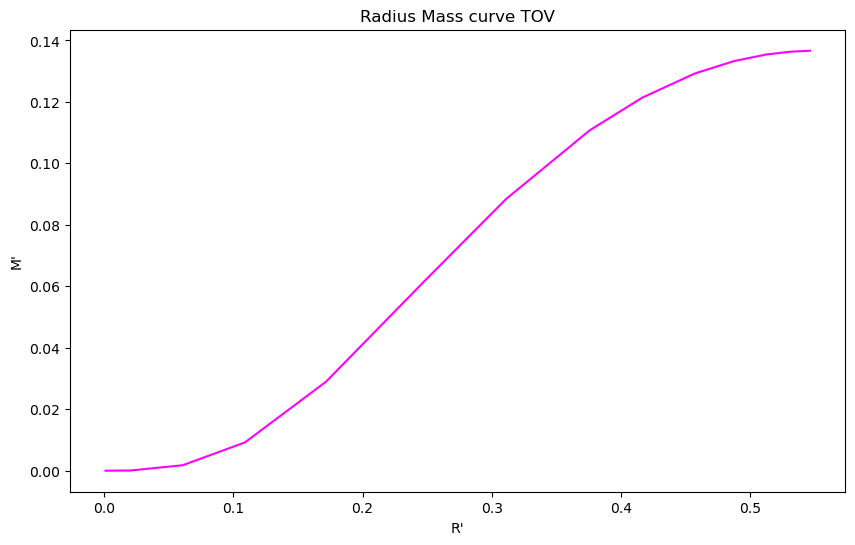

In [197]:
# radius vs mass curve

plt.figure(figsize=(10,6))
plt.plot(radius, mass, color = "magenta")
plt.xlabel("R'")
plt.ylabel("M'")
plt.title("Radius Mass curve TOV")
plt.savefig("Radius Mass curve TOV 1")

Text(0.5, 1.0, 'Radius Pressure curve TOV')

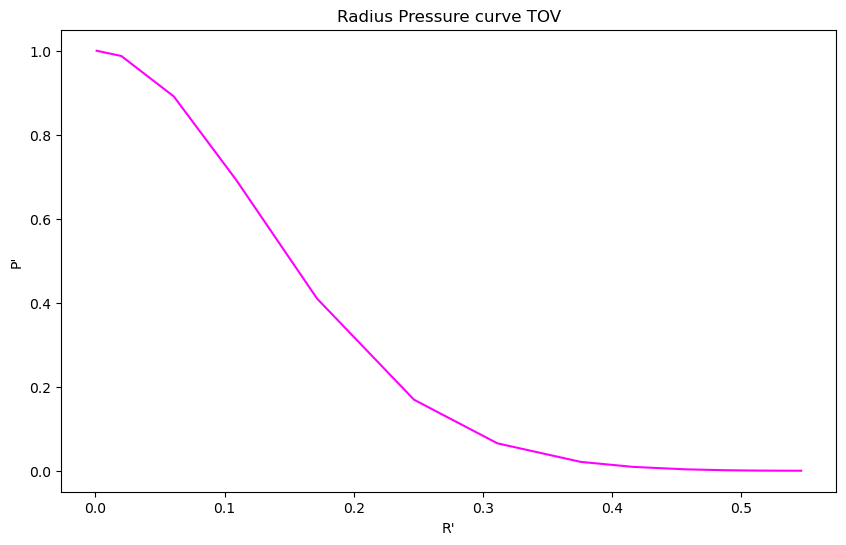

In [198]:
#radius vs pressure plot

plt.figure(figsize=(10,6))
plt.plot(radius, pressure, color = "magenta")
plt.xlabel("R'")
plt.ylabel("P'")
#plt.xscale('log')
plt.title("Radius Pressure curve TOV")

noting that from the eos, epsilon is given by:

\begin{equation} \varepsilon' = \sqrt{\frac{p'}{y^{2}}} + {p'}\end{equation}
$$

In [199]:
#can find epsilon

epsilon_solved = np.sqrt(pressure/y**2)+pressure

/var/folders/yk/6znk8k3515nd6789m74jg9h80000gn/T/ipykernel_2367/4211197824.py:3: RuntimeWarning: invalid value encountered in sqrt
  epsilon_solved = np.sqrt(pressure/y**2)+pressure


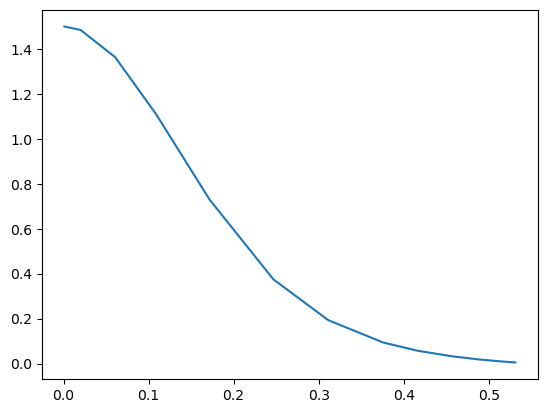

In [200]:
plt.plot(radius, epsilon_solved)

## M' and R' plots and calculations

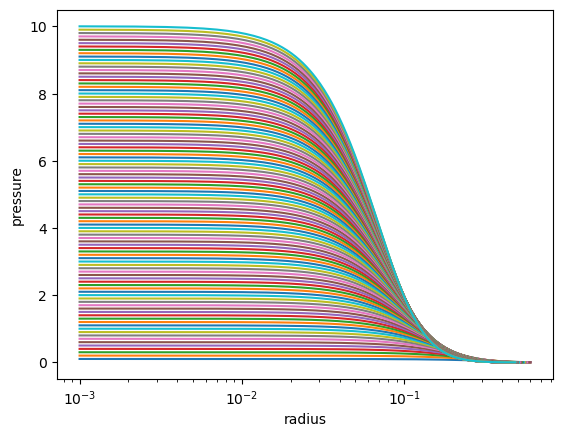

In [201]:
#define inital pressures to loop over

p_initial = np.linspace(0.1, 10, 100)

M_P_R = np.zeros((len(p_initial), 3))

for i, p in enumerate(p_initial):
    #redefine initial mass
    M0 = 0
    
    #redefine initial conditions
    initial_conditons = [p, M0]
    
    #resolve TOV
    solution = solve_ivp(TOV, rad, initial_conditons, t_eval=r, events=event_function)
        
    #extract new results
    radius_solved = solution.t
    pressure_solved = solution.y[0]
    mass_solved = solution.y[1]
    
    #plor r vs p
    plt.plot(radius_solved, pressure_solved)
    plt.xlabel('radius')
    plt.ylabel('pressure')
    plt.xscale('log')
    
    
    #final pressure, mass, radius
    
    M = mass_solved[-1]
    P = pressure_solved[-1]
    R = radius_solved[-1]
    
    M_P_R[i] = [M,P,R]
    
    
    

Text(0, 0.5, 'M')

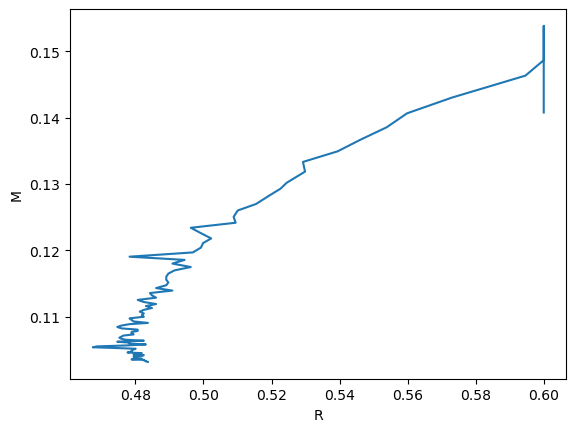

In [202]:
M = M_P_R[:, 0]
P = M_P_R[:, 1]
R = M_P_R[:, 2]


#plotting M vs R
plt.plot(R, M)
plt.xlabel("R")
plt.ylabel("M")

Rescaling

[0.2346338  0.25493596 0.25637912 0.25282847 0.24777937 0.24610281
 0.24960073 0.2512463  0.2501666  0.25026794 0.25012966 0.25193158
 0.24888284 0.24823477 0.24739345 0.24693031 0.24636949 0.247054
 0.24574714 0.24372254 0.24867387 0.24554682 0.24250917 0.2422539
 0.2412006  0.24089492 0.24891565 0.23978907 0.24041612 0.23674988
 0.23803031 0.23791439 0.23725085 0.23633933 0.23518162 0.23462314
 0.2351939  0.23212529 0.23451795 0.23349779 0.23221773 0.23412141
 0.23259227 0.23024242 0.23104416 0.22958827 0.23014334 0.23015512
 0.22902926 0.22878319 0.22799766 0.22947137 0.22869778 0.22793634
 0.22550666 0.22766035 0.22835202 0.2284899  0.22746736 0.22480271
 0.22440936 0.22488778 0.2245013  0.22386413 0.22490711 0.22485484
 0.22479306 0.22418536 0.22330863 0.22050399 0.22380374 0.22183706
 0.22154202 0.21907594 0.22149488 0.22515841 0.22546444 0.22239939
 0.21908663 0.21911495 0.21914671 0.21891575 0.21868481 0.21900603
 0.21689209 0.216925   0.21754824 0.21599166 0.21606129 0.2169452

Equate cooling time and freefall time using Eq 36 and 37 from Structure Formation and Exotic Compact Objects in a Dissipative Dark Sector paper

The Λ factor in the cooling time is the Bremsstrahlung energy emission rate per unit mass, which can be calculated from Eq 40 in the same paper. The expression for Λ is a function of mass density and temperature. The portion of the equation which makes this applicable to dark matter is the decaying exponential term, which is added because DM takes longer and is less efficient in structure formation.

The exponential term is a function of β, the ratio of the dark photon mass to the dark boson mass, and T’, which is the temperature divided by the boson mass. 

 ⍺ is the coupling strength, which is related to the value y from our TOV code, this number should be <1 for optically thin regimes

The mass of the the dark photon is a parameter we can vary, where m<<mb. 

Only the Λ from Bremsstrahlung is considered because the Λ  from Compton scattering will be significantly smaller. 

The goal is to plug Λ  into the expression for cooling time and equate htat the the expression for freefall time.

first i must equate tcooling and tfreefall and solve for n in terms of T

the expression for freefall time is given by:

$$ t_{\text{ff}} \equiv \left( \frac{1}{16\pi G \rho_{bD}} \right)^{1/2} $$

where G is the graviatational constant and $$ \rho_{bD} $$ is the boson number density

the expression for the cooling time is given by:

 $$ t_{\text{cooling}} \equiv \frac{3T_{bD}}{m \Lambda} $$

Where T is the temperature and $\Lambda $ is the Bremsstrahlung energy emission rate per unit mass

\begin{align*}
n_{\text{db}} &= \frac{144}{1024} \frac{G\pi}{a^{3}} m_{\text{db}}^5 \frac{1}{T'} \exp \left( -\frac{2B}{T'} \right)
\end{align*}

where G is the gravitational constant, Mbd is the mass of the dark boson, Tprime= T/mbd, B=Mphoton/Mboson

In [74]:
G = 6.67e-11
B = 1e-10
m=1
a=0.1
def number_density(Tprime):
    return (144/1024)*(np.pi)*(m**5)/(Tprime)/a**3 *np.e**((2*B)/Tprime)

T_prime_vals=np.logspace(0.00005, 0.00015)

t_num = number_density(T_prime_vals)

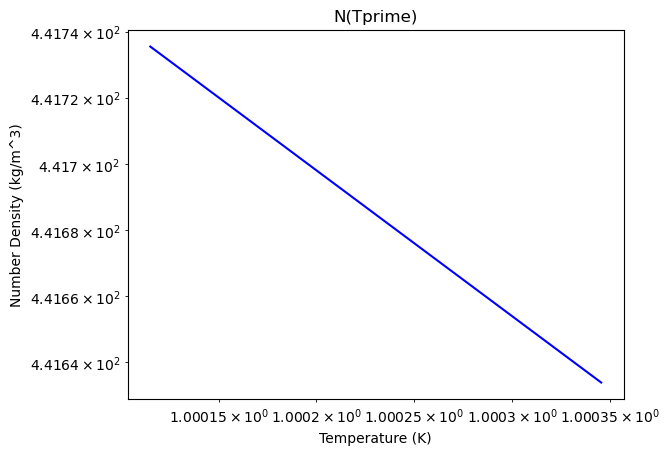

In [75]:
plt.plot(T_prime_vals, t_num, color='blue', linestyle='-')
plt.xlabel('Temperature (K)')
plt.ylabel('Number Density (kg/m^3)')
plt.title('N(Tprime)')
plt.yscale("log")
plt.xscale("log")
plt.grid(True)

plt.show()

to find power-law dependance:

take the generic equation N = aT^b, where a and b are constants. Taking the log of both sides yields log(N) = log(a) + blog(T). Using linear regression, we can extract the parameters a and b to find power law dependances.


In [76]:
#using np.polyfit
logT = np.log(T_prime_vals)
lognum = np.log(t_num)

coeffs, uncertainty = np.polyfit(logT, lognum, 1, cov = True)
slope = coeffs[0]
intercept = coeffs[1]
print(slope)


-1.000000000188223


now to define the speed of sound:

\begin{equation}
c_s^2 = \frac{dP}{d\epsilon}
\end{equation}

where:
\begin{align*}
P &= n \cdot T \\
\epsilon &= m \cdot n
\end{align*}

Therefore, we have:
\begin{align*}
P &= \frac{\epsilon}{m} \cdot T \\
\frac{dP}{d\epsilon} &= \frac{T}{m} = c_s^2
\end{align*}

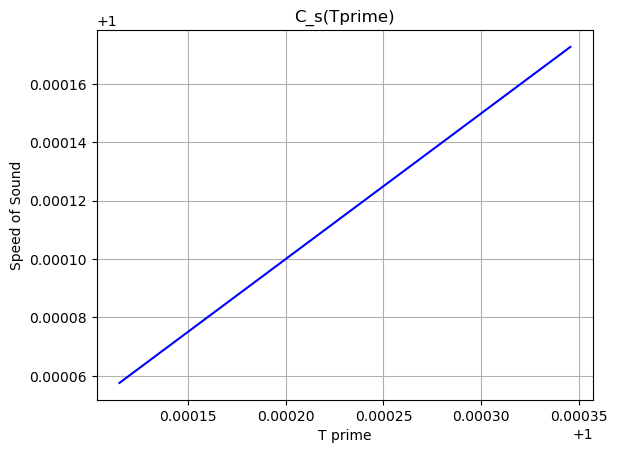

In [179]:
#by inserting T prime you would just get sqrt(T'), since i set m=1 this is valid
def cs(T):
    m= 1
    return np.sqrt(T/m)

c_sound = cs(T_prime_vals)

plt.plot(T_prime_vals, c_sound, color='blue', linestyle='-')
plt.xlabel('T prime')
plt.ylabel('Speed of Sound')
plt.title('C_s(Tprime)')
plt.grid(True)

now we can define the jeans mass using the speed of sound

\begin{equation}
m_j = \frac{\pi}{6} c^3 s \left( \frac{\pi}{\rho G} \right)^{3/2} \left( \rho_b \right)
\end{equation}



In [180]:
#rhoboson = n*m
#use cs(t)
rho =1
def jean(T):
    return np.pi/6 * (cs(T))**3 * (np.pi/(rho))**(3/2) * number_density(T)*m

m_jean = jean(T_prime_vals)

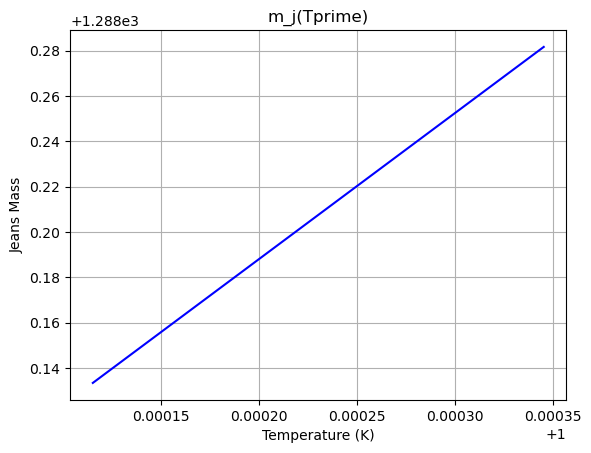

In [206]:
plt.plot(T_prime_vals, m_jean, color='blue', linestyle='-')
plt.xlabel('Temperature (K)')
plt.ylabel('Jeans Mass')
plt.title('m_j(Tprime)')
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)

In [182]:
#i can do the same analysis as i did for the temp-number density graph
logjean = np.log(m_jean)

coeffs_jeans, uncertainty_jeans = np.polyfit(logT, logjean, 1, cov = True)
slope_jeans = coeffs_jeans[0]
intercept_jeans = coeffs_jeans[1]
print(slope_jeans)


0.4999999998086178


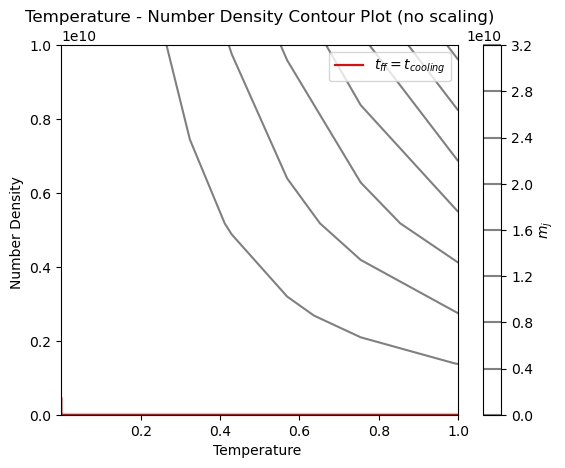

In [265]:
#making a contour plot

#ranges

temp_range = np.logspace(-6, 0)
num_range = np.logspace(-4,10)


T_plot, numdensity_plot = np.meshgrid(temp_range, num_range)

def mj(num, T):
    return np.pi/6 * (cs(T))**3 * (np.pi/(rho))**(3/2) * num



M_J = mj(numdensity_plot, T_plot)


num_plot = number_density(temp_range)



plt.plot(temp_range, num_plot, color='red', linestyle='-', label="$t_{ff} = t_{cooling}$")
plt.contour(T_plot, numdensity_plot, M_J, colors="grey")
plt.colorbar(label='$m_j$')
plt.xlabel('Temperature ')
plt.ylabel('Number Density ')
plt.legend(loc="best")
plt.title("Temperature - Number Density Contour Plot (no scaling)")
plt.show()

This plot does not show the red line, $t_{ff} = t_{cooling}$ very well, so we can try different combinations of log plots

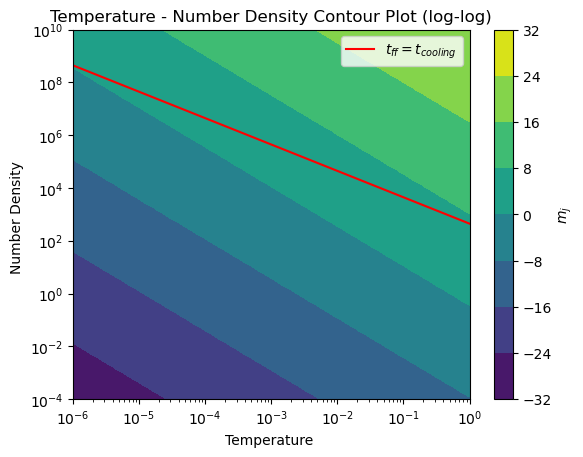

In [266]:
#this is a log-log plot of t_ff = t_cooling and a countour plot of T_plot, numdenisty_plot, and the log of M_j

#not sure if this is valid because taking th log of M_j yields negative M_j values


plt.loglog(temp_range, num_plot, color='red', linestyle='-', label="$t_{ff} = t_{cooling}$")
plt.contourf(T_plot, numdensity_plot, np.log(M_J))
plt.colorbar(label='$m_j$')
plt.xlabel('Temperature ')
plt.ylabel('Number Density ')
plt.legend(loc="best")
plt.title("Temperature - Number Density Contour Plot (log-log)")
plt.show()

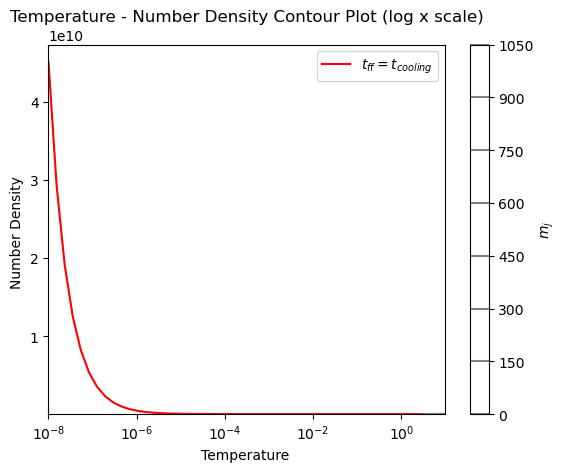

In [224]:
#here is when only the x-scale is turned to log


plt.plot(temp_range, num_plot, color='red', linestyle='-', label="$t_{ff} = t_{cooling}$")
plt.contour(T_plot, numdensity_plot, M_J, colors="grey")
plt.colorbar(label='$m_j$')
plt.xlabel('Temperature ')
plt.ylabel('Number Density ')
plt.legend(loc="best")
plt.xscale("log")
plt.title("Temperature - Number Density Contour Plot (log x scale)")
plt.show()

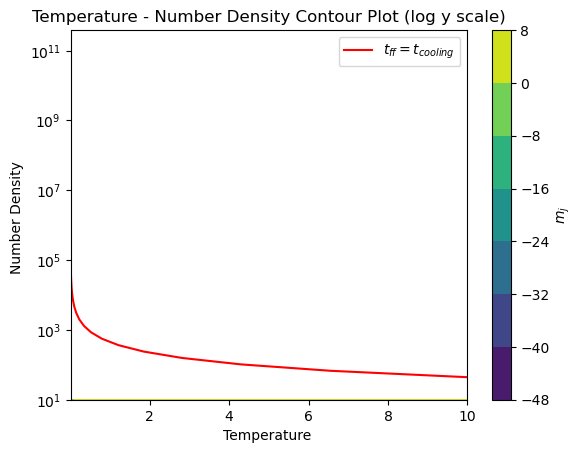

In [227]:
#here is when only the y-scale is turned to log

#red line is not visible

plt.plot(temp_range, num_plot, color='red', linestyle='-', label="$t_{ff} = t_{cooling}$")
plt.contourf(T_plot, numdensity_plot, np.log(M_J))
plt.colorbar(label='$m_j$')
plt.xlabel('Temperature ')
plt.ylabel('Number Density ')
plt.legend(loc="best")
plt.yscale("log")
plt.title("Temperature - Number Density Contour Plot (log y scale)")
plt.show()

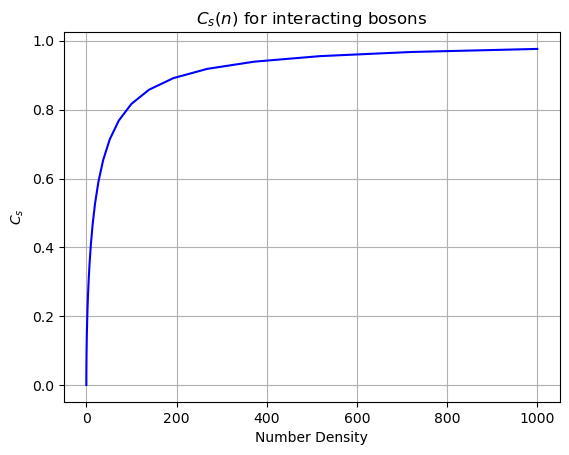

In [211]:
#with interaction terms, write C_s as a fxn of number density and set T=0

y= 1e-2
def cs_int(n):
    x = m/(2*y*n)
    return 1/np.sqrt(1+x)

#defien number denisty values
n_vals = np.logspace(-4, 3)
c_interacting = cs_int(n_vals)


plt.plot(n_vals, c_interacting, color='blue', linestyle='-')
plt.xlabel('Number Density')
plt.ylabel('$C_s$')
plt.title('$C_s(n)$ for interacting bosons')
plt.grid(True)

In [113]:
#new jeans mass with interaction term, insert C_s(n)
rho =1
def jean_int(n):
    return np.pi/6 * (cs_int(n))**3 * (np.pi/(rho))**(3/2) * n*m

m_jean_int = jean_int(n_vals)

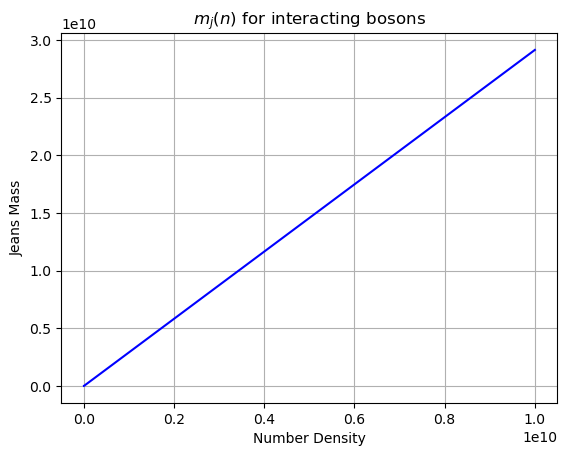

In [190]:


plt.plot(n_vals, m_jean_int, color='blue', linestyle='-')
plt.xlabel('Number Density')
plt.ylabel('Jeans Mass')
plt.title('$m_j(n)$ for interacting bosons')
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)